# Anscombe's Quartet

The raw data has four series. The correlation coefficients are high.
Visualization shows that a simple linear regression model is misleading.

## Raw Data for the Series

In [1]:
import json
from pathlib import Path
import statistics

from pydantic import BaseModel

In [2]:
class Pair(BaseModel):
    x: float
    y: float

class Series(BaseModel):
    series: str
    data: list[Pair]

    @property
    def x(self) -> list[float]:
        return [p.x for p in self.data]
        
    @property
    def y(self) -> list[float]:
        return [p.y for p in self.data]

    @property
    def correlation(self) -> float:
        return statistics.correlation(self.x, self.y)

    @property
    def regression(self) -> tuple[float, float]:
        return statistics.linear_regression(self.x, self.y)

In [3]:
source = Path.cwd().parent.parent / "data" / "anscombe.json"
with source.open() as source_file:
    json_document = json.load(source_file)
    source_data = (Series.model_validate(s) for s in json_document)
    quartet = {s.series: s for s in source_data}

In [4]:
quartet['I']

Series(series='I', data=[Pair(x=10.0, y=8.04), Pair(x=8.0, y=6.95), Pair(x=13.0, y=7.58), Pair(x=9.0, y=8.81), Pair(x=11.0, y=8.33), Pair(x=14.0, y=9.96), Pair(x=6.0, y=7.24), Pair(x=4.0, y=4.26), Pair(x=12.0, y=10.84), Pair(x=7.0, y=4.82), Pair(x=5.0, y=5.68)])

In [5]:
quartet['IV']

Series(series='IV', data=[Pair(x=8.0, y=6.58), Pair(x=8.0, y=5.76), Pair(x=8.0, y=7.71), Pair(x=8.0, y=8.84), Pair(x=8.0, y=8.47), Pair(x=8.0, y=7.04), Pair(x=8.0, y=5.25), Pair(x=19.0, y=12.5), Pair(x=8.0, y=5.56), Pair(x=8.0, y=7.91), Pair(x=8.0, y=6.89)])

## Statistical Computations

Two properties compute correlation coefficient, $r$, and perform linear regression.
The regression gives us two parameters for a line.
- Slope, $m$.
- Intercept, $b$.

The equation is $y = m \times x + b$

In [6]:
quartet['I'].correlation

0.81642051634484

In [9]:
r = quartet['I'].regression
f"y = {r.slope:.1f} * x + {r.intercept:.1f}"

'y = 0.5 * x + 3.0'

## Visualization

In [10]:
from matplotlib import pyplot as plt

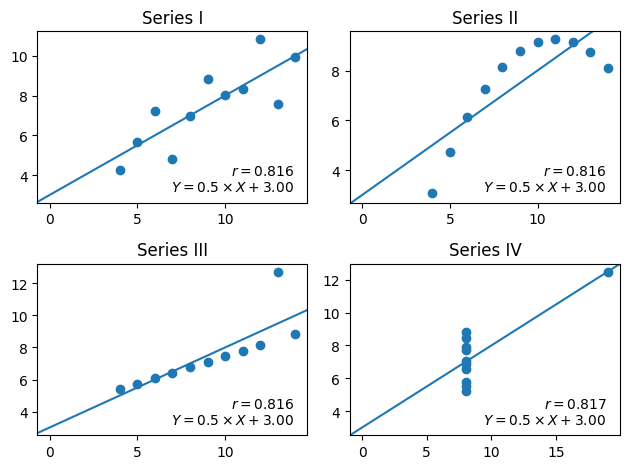

In [13]:
fig = plt.figure(layout='tight')
ax_dict = fig.subplot_mosaic(
    [
        ["I", "II"],
        ["III", "IV"],
    ],
)
for name, ax in ax_dict.items():
    series = quartet[name]
    ax.scatter(series.x, series.y)
    ax.set_title(f"Series {name}")
    lr = series.regression
    eq1 = rf"$r = {series.correlation:.3f}$"
    eq2 = rf"$Y = {lr.slope:.1f} \times X + {lr.intercept:.2f}$"
    ax.text(.95, .05, f"{eq1}\n{eq2}",
            fontfamily='sans-serif',
            horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    ax.axline((0, lr.intercept), slope=lr.slope)
plt.show()